<a href="https://colab.research.google.com/github/mrkhan0004/Datasets_ML/blob/main/SMS_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NAIVE Bayes theorem


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mrkhan0004/Datasets_ML/refs/heads/main/SMSSpamCollection.csv",sep='\t')

In [ ]:
df.shape

(5571, 2)

In [ ]:
df.dtypes

,0
ham,object
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",object


In [ ]:
df.columns = ["Labels","Comments"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5571 non-null   object
 1   Comments  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
print(df.isnull().sum())

Labels      0
Comments    0
dtype: int64


In [ ]:
df["Labels"].value_counts()

,count
Labels,
ham,4824
spam,747


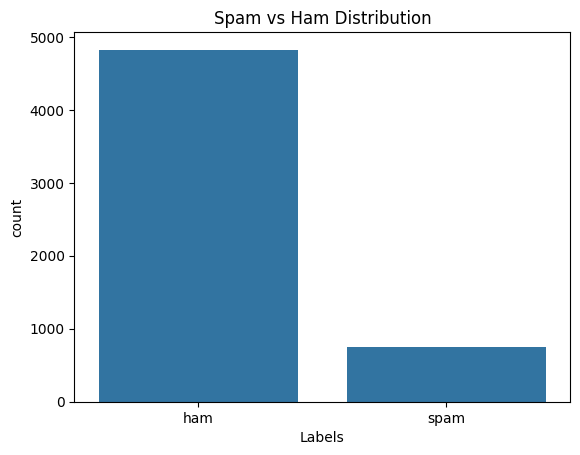

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Labels', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

In [ ]:
import re
import nltk


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function to the 'Comments' column instead of 'text'

df['cleaned_text'] = df['Comments'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Labels,Comments,cleaned_text
0,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl week word back like fun still...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfd = TfidfVectorizer()

In [ ]:
y = df["Lables"].map()

In [ ]:
x = tfd.fit_transform(df["cleaned_text"]).toarray()